<a href="https://colab.research.google.com/github/RonnyGuevara/Machine-Learning/blob/main/TP2/TP2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica 2:  Estadística paramétrica y curva ROC

##Presentado por: Ronny Guevara

## Objetivo General
Desarrollar aplicativos que permitan dar solvencia a los problemas propuestos en la materia.
## Objetivos Específicos
*   Analizar estadísticamente el comportamiento de los valores descritos en los dataset propuestas.
*   Mediante el umbral proponer un clasificador de mínimo error utilizando la curva ROC.
*   Visualización de resultados

Problema
Dados los datasets de la situación epidemiológica y sanitaria de Bahía Blanca en los últimos meses (https://datos.bahia.gob.ar/dataset?groups=covid19), responder las siguientes interrogantes: 
  *   ¿Hay variables que puedan ser razonablemente consideradas normales?
  *   ¿Hay variables que tienen un comportamiento sospechoso?

Generar un dataset (dos conjuntos Gaussianos con diferente media y DS, N=50 C/U, uno con etiqueta A y otro con etiqueta B. Realizar las siguientes acciones:
  *   Utilizar la curva ROC para proponer un umbral para un clasificador por mínimo error
  *   Evaluar alguno de los parámetros de calidad (exactitud, precisión, f-measure)
  *   Recalcular para algunas variantes (cambio de valor umbral, cambiando la media de los grupos, etc.)
  *   ¿Como se podría hacer no supervisado al proceso?






###Solución
Se plantea posibles soluciones, para el primer problema se desarrolla un aplicativo que permita al usuario visualizar los datos epidemiológicos como DataFrame para posterior representarlas mediante gráficas. La visualización permite verificar si alguna variable tiende a un comportamiento sospechoso. Para dar solución al segundo problema, se desarrolla un aplicativo que concatena y ordena los datos para posterior graficar su curva ROC

In [1]:
import numpy as np
from itertools import cycle
import matplotlib.pyplot as plt
import requests
import pandas as pd
import json
from pandas.io.json import json_normalize
from bs4 import BeautifulSoup

In [2]:
def read_web_bahia(url):

    res = requests.get(url)
    soup = BeautifulSoup(res.content, "lxml")
    qr = soup.select('html')[0].text.strip('jQuery1720724027235122559_1542743885014(').strip(')')
    qr = qr.replace('null','"placeholder"')
    data = json.loads(qr)
    data = json_normalize(data)
    df = pd.DataFrame(data)
    print(df)
    return df

In [3]:
covid_cases_Bahia_Blanca_url = 'https://gobiernoabierto.bahia.gob.ar/WS/3032'
covid_cases_Bahia_Blanca_df = read_web_bahia(covid_cases_Bahia_Blanca_url)
covid_cases_Bahia_Blanca_df['fecha'] = pd.to_datetime(covid_cases_Bahia_Blanca_df['fecha'])
covid_cases_Bahia_Blanca_df

          fecha  confirmados  activos  recuperados  decesos  descartados  \
0    2020-03-19            0        0            0        0            2   
1    2020-03-20            0        0            0        0            0   
2    2020-03-21            1        1            0        0            4   
3    2020-03-22            1        1            0        0            5   
4    2020-03-23            3        3            0        0            6   
..          ...          ...      ...          ...      ...          ...   
750  2022-04-08        69839       71        68721     1047            0   
751  2022-04-09        69839       56        68736     1047            0   
752  2022-04-10        69839       45        68746     1048            0   
753  2022-04-11        69845       41        68756     1048            0   
754  2022-04-12        69848       38        68761     1049            0   

     sospechosos  contencion_psicologica  monitoreo_epidemiologico  \
0              4 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
0,2020-03-19,0,0,0,0,2,4,0,380,0,0
1,2020-03-20,0,0,0,0,0,3,0,405,0,31
2,2020-03-21,1,1,0,0,4,2,0,502,8,73
3,2020-03-22,1,1,0,0,5,1,0,455,0,71
4,2020-03-23,3,3,0,0,6,0,0,439,0,64
...,...,...,...,...,...,...,...,...,...,...,...
750,2022-04-08,69839,71,68721,1047,0,0,0,280,0,0
751,2022-04-09,69839,56,68736,1047,0,0,0,280,0,0
752,2022-04-10,69839,45,68746,1048,0,0,0,280,0,0
753,2022-04-11,69845,41,68756,1048,0,0,0,280,0,0


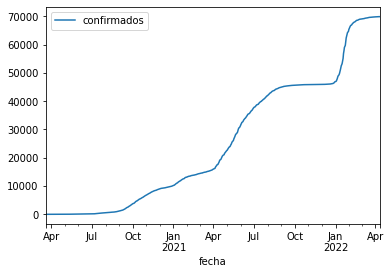

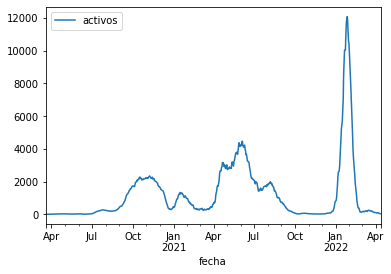

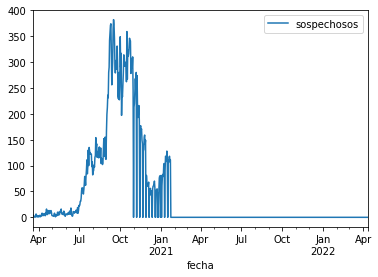

In [4]:
covid_cases_Bahia_Blanca_df.plot.line(y="confirmados", x="fecha")
covid_cases_Bahia_Blanca_df.plot.line(y="activos", x="fecha")
covid_cases_Bahia_Blanca_df.plot.line(y="sospechosos", x="fecha")

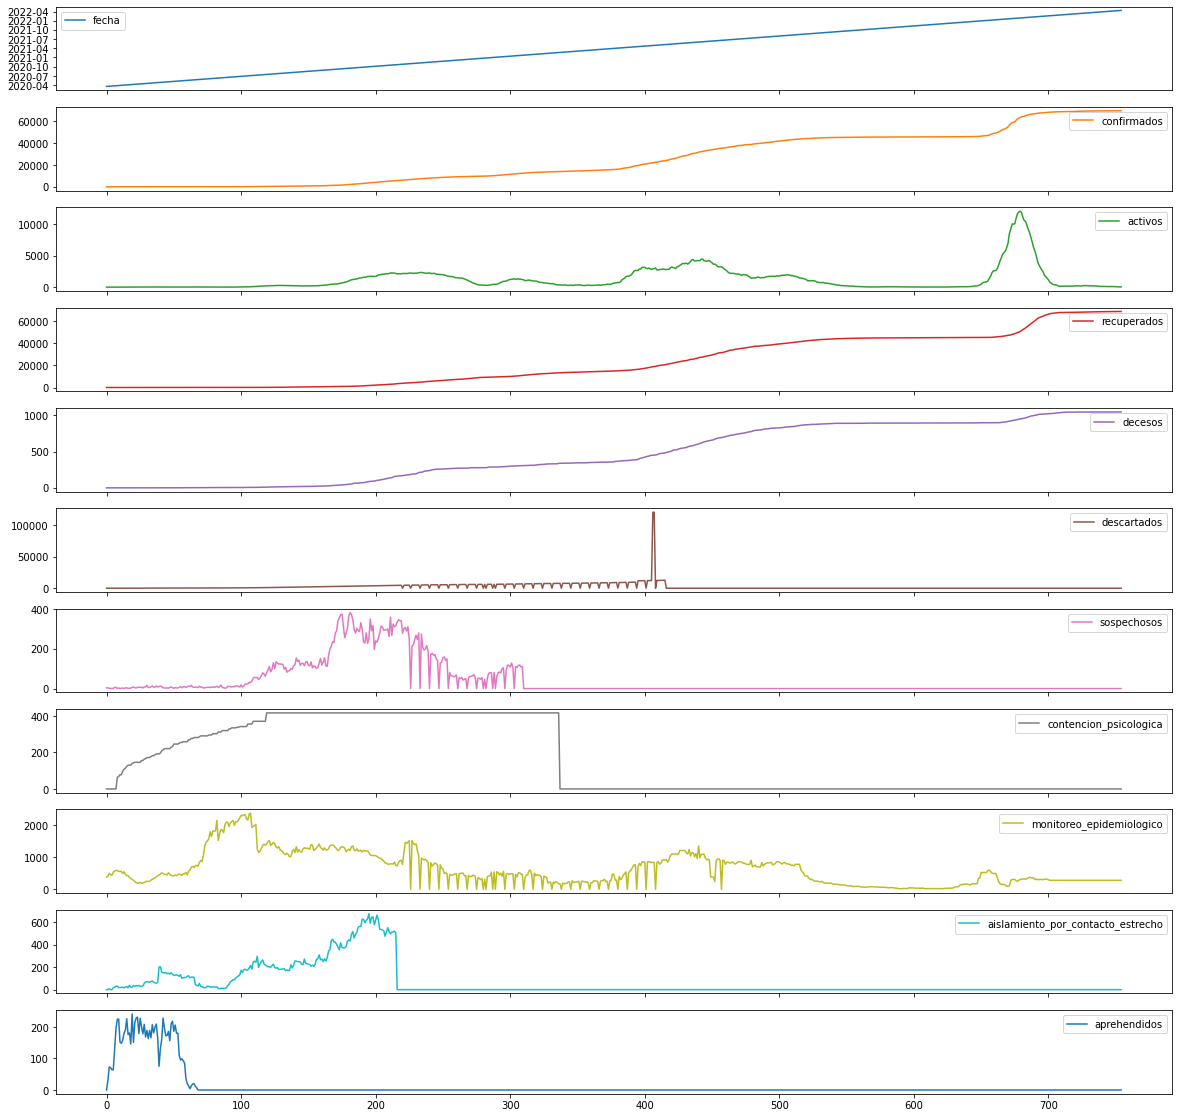

In [5]:
covid_cases_Bahia_Blanca_df.plot(label='fecha',subplots=True,figsize=(20,20))
plt.show()

La variable "sospechosos" tiene un comportamiento anormal, con fecha del 22/01/2021 dicha variable tenía un valor de 111, al 23/01/2021 toma un valor de 0 el cual se mantiene constante, se puede concluir que a partir de esta última fecha toda persona fue diagnosticada directamente como confirmado

In [6]:
covid_beds_Bahia_Blanca_url = 'https://gobiernoabierto.bahia.gob.ar/WS/3028'
covid_beds_Bahia_Blanca_df = read_web_bahia(covid_beds_Bahia_Blanca_url) 
covid_beds_Bahia_Blanca_df['fecha'] = pd.to_datetime(covid_beds_Bahia_Blanca_df['fecha'])
covid_beds_Bahia_Blanca_df.describe()
covid_beds_Bahia_Blanca_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


      id       fecha  intensivostotal  intensivosocupadas  \
0    343  2022-04-13               71                  40   
1    342  2022-04-12               76                  37   
2    341  2022-04-11               74                  32   
3    340  2022-04-10               74                  31   
4    339  2022-04-09               74                  34   
..   ...         ...              ...                 ...   
334    5  2021-05-18               72                  49   
335    4  2021-05-17               81                  55   
336    3  2021-05-16              100                  69   
337    2  2021-05-15              107                  77   
338    1  2021-05-14              107                  79   

     intensivosconfirmados  intensivossospechosos  intermediostotal  \
0                        0                      0               316   
1                        0                      0               316   
2                        0                      0     

,id,fecha,intensivostotal,intensivosocupadas,intensivosconfirmados,intensivossospechosos,intermediostotal,intermediosocupadas,intermediosconfirmados,intermediossospechosos,minimostotal,minimosocupadas,minimosconfirmados,minimossospechosos,ucmasedes,ucmatotal,ucmaocupadas
0,343,2022-04-13,71,40,0,0,316,146,0,4,444,196,3,0,2,80,0
1,342,2022-04-12,76,37,0,0,316,146,0,3,440,175,3,0,2,80,0
2,341,2022-04-11,74,32,0,0,316,140,0,4,439,209,3,0,2,80,0
3,340,2022-04-10,74,31,0,0,316,137,0,4,440,175,3,0,2,80,0
4,339,2022-04-09,74,34,0,1,316,148,0,4,443,208,3,0,2,80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,5,2021-05-18,72,49,32,0,217,134,47,6,330,209,54,8,3,102,11
335,4,2021-05-17,81,55,36,1,208,128,37,11,330,197,54,11,3,102,11
336,3,2021-05-16,100,69,44,1,191,118,33,8,331,196,61,9,3,102,11
337,2,2021-05-15,107,77,50,1,185,111,25,6,337,193,58,8,3,102,11


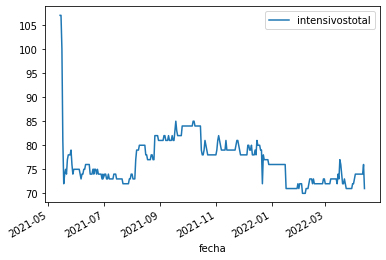

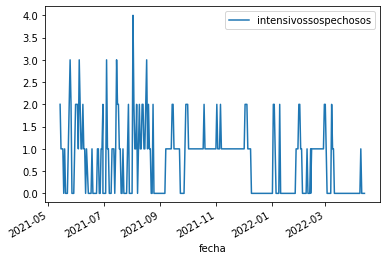

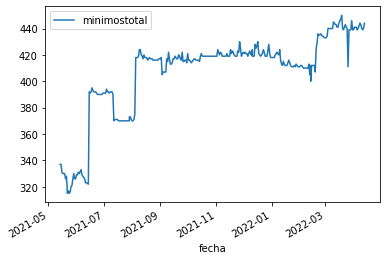

In [7]:
covid_beds_Bahia_Blanca_df.plot.line(y="intensivostotal", x="fecha")
covid_beds_Bahia_Blanca_df.plot.line(y="intensivossospechosos", x="fecha")
covid_beds_Bahia_Blanca_df.plot.line(y="minimostotal", x="fecha")

In [8]:
df = pd.merge(covid_cases_Bahia_Blanca_df, covid_beds_Bahia_Blanca_df,  how='inner', on=["fecha"])
df

,fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,...,intermediosocupadas,intermediosconfirmados,intermediossospechosos,minimostotal,minimosocupadas,minimosconfirmados,minimossospechosos,ucmasedes,ucmatotal,ucmaocupadas
0,2021-05-14,25762,3126,22116,520,0,0,0,1106,0,...,122,24,10,337,202,56,9,3,102,14
1,2021-05-15,25894,3043,22328,523,0,0,0,1106,0,...,111,25,6,337,193,58,8,3,102,11
2,2021-05-16,26102,2943,22634,525,0,0,0,1101,0,...,118,33,8,331,196,61,9,3,102,11
3,2021-05-17,26648,3245,22877,526,0,0,0,1101,0,...,128,37,11,330,197,54,11,3,102,11
4,2021-05-18,26967,3291,23141,535,0,0,0,1099,0,...,134,47,6,330,209,54,8,3,102,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,2022-04-08,69839,71,68721,1047,0,0,0,280,0,...,162,0,6,444,214,3,0,2,80,0
334,2022-04-09,69839,56,68736,1047,0,0,0,280,0,...,148,0,4,443,208,3,0,2,80,0
335,2022-04-10,69839,45,68746,1048,0,0,0,280,0,...,137,0,4,440,175,3,0,2,80,0
336,2022-04-11,69845,41,68756,1048,0,0,0,280,0,...,140,0,4,439,209,3,0,2,80,0


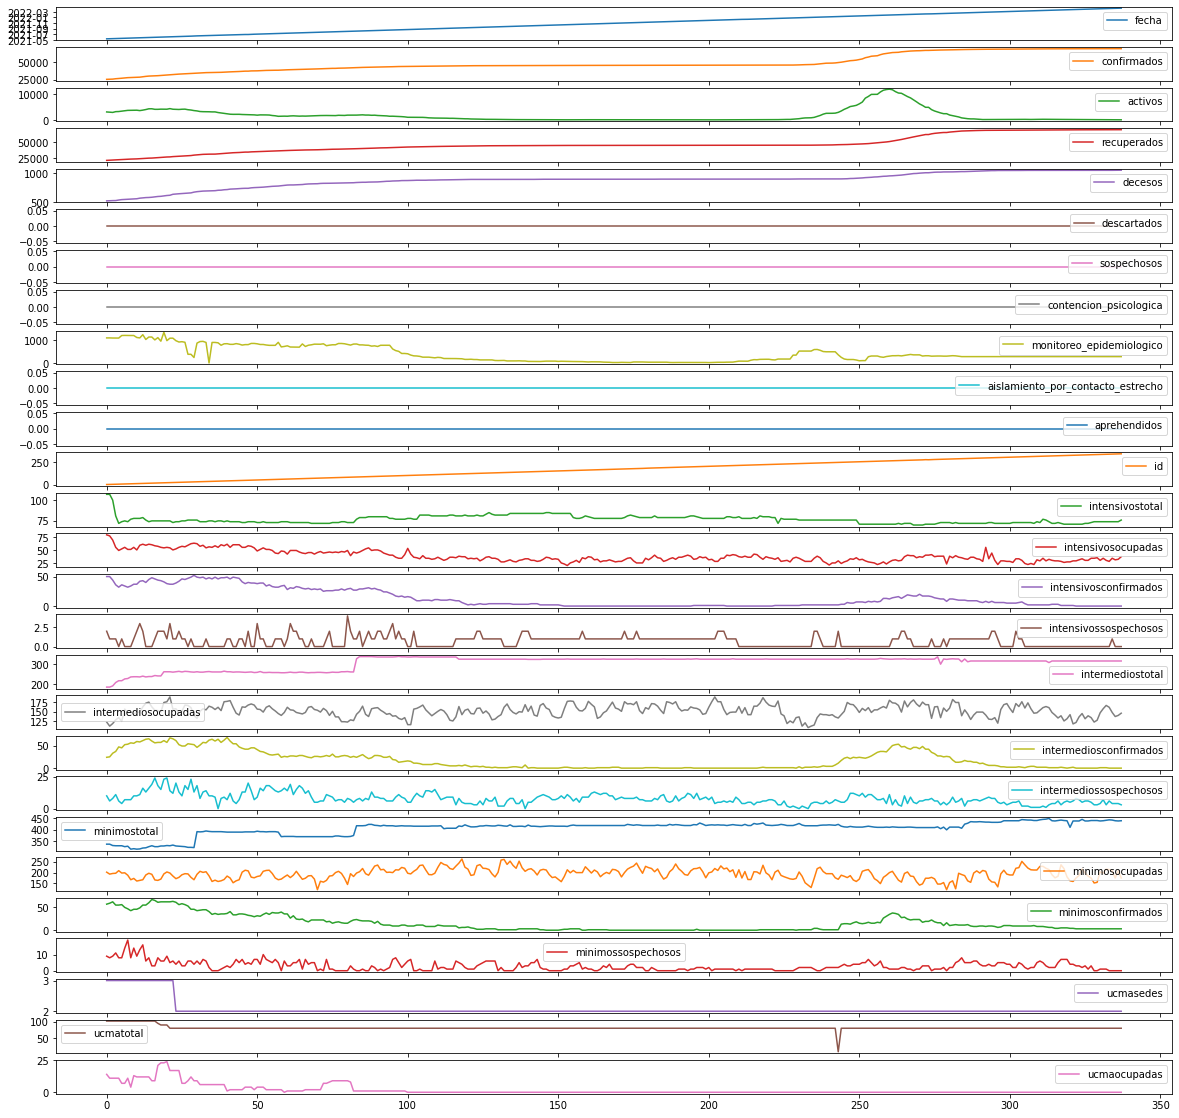

In [9]:
df.plot(label='fecha',subplots=True,figsize=(20,20))
plt.show()

EJERCICIO 2

In [10]:
#Montamos el drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
#Lectura de los dataset cada una contiene la altura de 50 jovenes con edades entre 16 y 18 años de la región de Mar del Plata
dataset1=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ALTURAHOMBRES.xlsx')
dataset2=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ALTURAMUJERES.xlsx')

In [12]:
#Lectura de los dataset como dataframe
dataset1=pd.DataFrame(dataset1)
dataset2=pd.DataFrame(dataset2)
#Función describe, retorna parámetros como: percentiles, desviación STD, media, número de datos
dataset1.describe()

,Altura
count,50.000000
mean,171.440000
std,3.130886
min,165.000000
25%,169.250000
50%,171.000000
75%,173.000000
max,179.000000


In [13]:
dataset2.describe()

,Altura
count,50.00000
mean,158.96000
std,3.35614
min,151.00000
25%,157.00000
50%,159.00000
75%,161.00000
max,167.00000


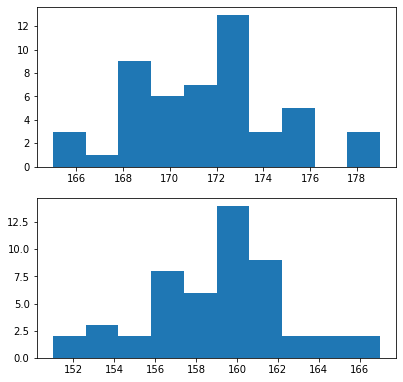

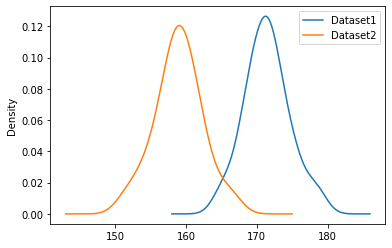

In [14]:
#Histograma de los dataset incluye gráfica de densidad
y=dataset1['Altura']
num_bins = 10
z=dataset2['Altura']
num_bins2 = 10

fig, axs = plt.subplots(2, 1, figsize=(6.45, 6.45))
axs[0].hist(y, num_bins)
axs[1].hist(z, num_bins2)
plt.show()

y.plot.density()
z.plot.density()
plt.legend(['Dataset1', 'Dataset2'])


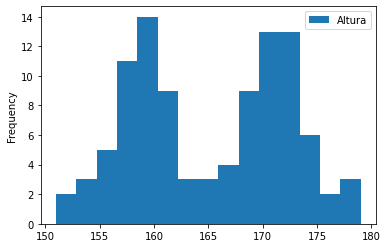

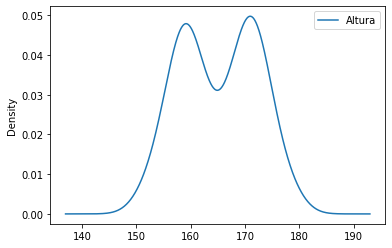

In [15]:
#Concatenación de los dataset
df = pd.concat([dataset1, dataset2])
df.plot.hist(bins=15)
df.plot.density()

In [16]:
#Se ordenan los datos
df_ord = df
df_ord.sort_values('Altura', inplace=True, ignore_index=True)
df_ord

,Etiqueta,Altura
0,B,151.0
1,B,152.0
2,B,153.0
3,B,154.0
4,B,154.0
...,...,...
95,A,176.0
96,A,176.0
97,A,178.0
98,A,178.0


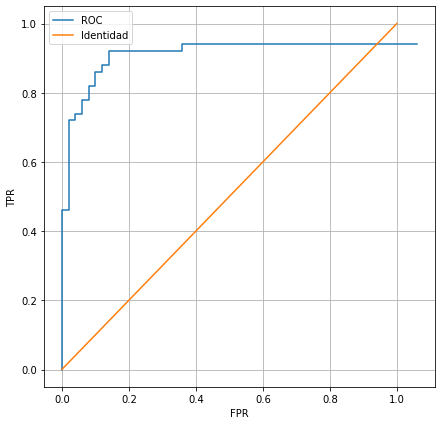

In [17]:
#Gráfica de la curva ROC
x_list, y_list = ([], [])
x_list.append(0)
y_list.append(0)

x, y = (0, 0)

for i in range(100):
    if df_ord.iloc[-(1+i), 0] == 'A':
        y += 1/50
    else:
        x += 1/50
    x_list.append(x)
    y_list.append(y)


plt.figure(1, (7,7))
plt.plot(x_list, y_list, [0,1], [0,1])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend(['ROC', 'Identidad'])

###Análisis de resultados

*   Mediante el análisis exploratorio de los datos podemos concluir que existen variables en las datasets de la situación epidemiológica y sanitaria de Bahía Blanca catalogadas como sospechosas, la variable "sospechosos" tiene un comportamiento anormal, con fecha del 22/01/2021 dicha variable tenía un valor de 111, al 23/01/2021 toma un valor de 0 el cual se mantiene constante, se puede decir que a partir de esta última fecha toda persona fue diagnosticada directamente como caso "confirmado"
*   Con respecto al segundo ejercicio, la gráfica ROC dado los datasets propuestas, determina como umbral para un clasificador de mínimo error con TPR: 0.92 y FPR: 0.18

